In [1]:
import requests

In [4]:
response= requests.get("https://xkcd.com")
response.headers

{'Connection': 'keep-alive', 'Content-Length': '3039', 'Server': 'nginx', 'Content-Type': 'text/html; charset=UTF-8', 'Last-Modified': 'Tue, 24 Jan 2023 05:08:14 GMT', 'ETag': 'W/"63cf67be-1e2f"', 'Expires': 'Wed, 25 Jan 2023 03:56:40 GMT', 'Cache-Control': 'max-age=300', 'Content-Encoding': 'gzip', 'Via': '1.1 varnish, 1.1 varnish', 'Accept-Ranges': 'bytes', 'Date': 'Wed, 25 Jan 2023 11:20:31 GMT', 'Age': '183', 'X-Served-By': 'cache-dfw-kdfw8210070-DFW, cache-cdg20720-CDG', 'X-Cache': 'HIT, HIT', 'X-Cache-Hits': '9, 1', 'X-Timer': 'S1674645631.336929,VS0,VE1', 'Vary': 'Accept-Encoding'}

In [5]:
response.headers["Expires"]

'Wed, 25 Jan 2023 03:56:40 GMT'

In [6]:
response.text

'<!DOCTYPE html>\n<html>\n<head>\n<link rel="stylesheet" type="text/css" href="/s/7d94e0.css" title="Default"/>\n<title>xkcd: Lane Change Highway</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n<link rel="shortcut icon" href="/s/919f27.ico" type="image/x-icon"/>\n<link rel="icon" href="/s/919f27.ico" type="image/x-icon"/>\n<link rel="alternate" type="application/atom+xml" title="Atom 1.0" href="/atom.xml"/>\n<link rel="alternate" type="application/rss+xml" title="RSS 2.0" href="/rss.xml"/>\n<!-- <script type="text/javascript" src="/s/b66ed7.js" async></script>\n<script type="text/javascript" src="/s/1b9456.js" async></script> -->\n\n<meta property="og:site_name" content="xkcd">\n\n<meta property="og:title" content="Lane Change Highway">\n<meta property="og:url" content="https://xkcd.com/2728/">\n<meta property="og:image" content="https://imgs.xkcd.com/comics/lane_change_highway_2x.png">\n<meta name="twitter:card" content="summary_large_image">\n\n</head>\n<body>\n<div 

In [7]:
import pandas as pd

In [10]:
data=pd.DataFrame(response.headers)
data

,0
0,Connection
1,Content-Length
2,Server
3,Content-Type
4,Last-Modified
5,ETag
6,Expires
7,Cache-Control
8,Content-Encoding
9,Via


In [19]:
images= requests.get("https://imgs.xkcd.com/comics/")
images

<Response [403]>

In [20]:
import random

In [21]:
type(images)

requests.models.Response

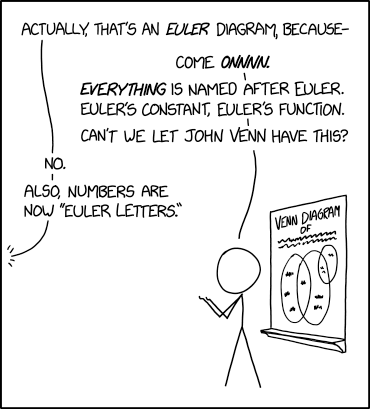

In [23]:
import IPython
image_path="https://imgs.xkcd.com/comics/euler_diagrams.png"
IPython.display.Image(image_path, width = 250)


In [25]:
image= random.choice(list(images))
print(image)
IPython.display.Image(image, width = 250)



b'nginx</center>\r\n</body>\r\n</html>\r\n'


In [26]:
IPython.display.Image(image, width = 250)

In [31]:
#Solution
import random
from IPython.display import Image
image = requests.get('https://xkcd.com/info.0.json')
image_results = image.json()

random_number = random.choice(range(1,image_results['num']+1))
random_image = requests.get(f"https://xkcd.com/{random_number}/info.0.json")
random_image_results = random_image.json()
random_image_results
Image(url=random_image_results['img'])

## Challenge 2

In [3]:
#make a request
import requests
password=requests.get("https://httpbin.org/get")
password.headers

{'Date': 'Wed, 25 Jan 2023 14:10:30 GMT', 'Content-Type': 'application/json', 'Content-Length': '312', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

In [4]:
result=password.json()
result

{'args': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-63d13855-3cfc4e412f7a4e4508b66cb3'},
 'origin': '185.146.221.98',
 'url': 'https://httpbin.org/get'}

In [5]:
#view the url
result["url"]

'https://httpbin.org/get'

In [6]:
#add parameters things and total
parameters = {'things': '2', 'total': '25'}
r = requests.put('https://httpbin.org/get', params=parameters)

In [7]:
#I check the new url
r.url

'https://httpbin.org/get?things=2&total=25'

In [14]:
#add username and password as parameters
password_parameters={'username': 'Cle', 'password': 'ironhacklab13+'}
r=requests.put('https://httpbin.org/get', params=password_parameters)

In [15]:
print(r.url)

https://httpbin.org/get?username=Cle&password=ironhacklab13%2B


In [10]:
r.headers

{'Date': 'Wed, 25 Jan 2023 14:10:41 GMT', 'Content-Type': 'text/html', 'Content-Length': '178', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Allow': 'OPTIONS, HEAD, GET', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}

In [16]:
#new request with the new url to see the new parameters
result=requests.get("https://httpbin.org/get?username=Cle&password=ironhacklab13%2B")

In [17]:
result.json()

{'args': {'password': 'ironhacklab13+', 'username': 'Cle'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate, br',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.28.1',
  'X-Amzn-Trace-Id': 'Root=1-63d138cf-0c532aaf37f4e81661ea7ace'},
 'origin': '185.146.221.98',
 'url': 'https://httpbin.org/get?username=Cle&password=ironhacklab13%2B'}

In [29]:
#checking the type to see how extract a dictionnary
dictionnary=result.json()
type(dictionnary)

dict

In [30]:
response=dictionnary["args"]
print(response)

{'password': 'ironhacklab13+', 'username': 'Cle'}


# Challenge 3

In [11]:
import requests
#url for the request : https://api.github.com/search/code?q= is the beginning of all api github
#".scavengerhunt" = extension of the file 
#+in:path it is where I search it
#+repository 
response = requests.get('https://api.github.com/search/code?q=.scavengerhunt+in:path+repo:ironhack-datalabs/scavenger')
search = response.json()
search


{'total_count': 24,
 'incomplete_results': False,
 'items': [{'name': '.0016.scavengerhunt',
   'path': '47222/.0016.scavengerhunt',
   'sha': 'f5cb13223fdc1b11f4cfbbe1694f533b3c579fa0',
   'url': 'https://api.github.com/repositories/162375181/contents/47222/.0016.scavengerhunt?ref=9308ccc8a4c34c5e3a991ee815222a9691c32476',
   'git_url': 'https://api.github.com/repositories/162375181/git/blobs/f5cb13223fdc1b11f4cfbbe1694f533b3c579fa0',
   'html_url': 'https://github.com/ironhack-datalabs/scavenger/blob/9308ccc8a4c34c5e3a991ee815222a9691c32476/47222/.0016.scavengerhunt',
   'repository': {'id': 162375181,
    'node_id': 'MDEwOlJlcG9zaXRvcnkxNjIzNzUxODE=',
    'name': 'scavenger',
    'full_name': 'ironhack-datalabs/scavenger',
    'private': False,
    'owner': {'login': 'ironhack-datalabs',
     'id': 44225188,
     'node_id': 'MDEyOk9yZ2FuaXphdGlvbjQ0MjI1MTg4',
     'avatar_url': 'https://avatars.githubusercontent.com/u/44225188?v=4',
     'gravatar_id': '',
     'url': 'https://api.g

In [13]:
search["items"]

[{'name': '.0016.scavengerhunt',
  'path': '47222/.0016.scavengerhunt',
  'sha': 'f5cb13223fdc1b11f4cfbbe1694f533b3c579fa0',
  'url': 'https://api.github.com/repositories/162375181/contents/47222/.0016.scavengerhunt?ref=9308ccc8a4c34c5e3a991ee815222a9691c32476',
  'git_url': 'https://api.github.com/repositories/162375181/git/blobs/f5cb13223fdc1b11f4cfbbe1694f533b3c579fa0',
  'html_url': 'https://github.com/ironhack-datalabs/scavenger/blob/9308ccc8a4c34c5e3a991ee815222a9691c32476/47222/.0016.scavengerhunt',
  'repository': {'id': 162375181,
   'node_id': 'MDEwOlJlcG9zaXRvcnkxNjIzNzUxODE=',
   'name': 'scavenger',
   'full_name': 'ironhack-datalabs/scavenger',
   'private': False,
   'owner': {'login': 'ironhack-datalabs',
    'id': 44225188,
    'node_id': 'MDEyOk9yZ2FuaXphdGlvbjQ0MjI1MTg4',
    'avatar_url': 'https://avatars.githubusercontent.com/u/44225188?v=4',
    'gravatar_id': '',
    'url': 'https://api.github.com/users/ironhack-datalabs',
    'html_url': 'https://github.com/iron

In [6]:
#list all the files
repo_files_names = [item["name"] for item in search["items"]]
repo_files_names.sort()
repo_files_names

['.0001.scavengerhunt',
 '.0002.scavengerhunt',
 '.0003.scavengerhunt',
 '.0004.scavengerhunt',
 '.0005.scavengerhunt',
 '.0006.scavengerhunt',
 '.0007.scavengerhunt',
 '.0008.scavengerhunt',
 '.0009.scavengerhunt',
 '.0010.scavengerhunt',
 '.0011.scavengerhunt',
 '.0012.scavengerhunt',
 '.0013.scavengerhunt',
 '.0014.scavengerhunt',
 '.0015.scavengerhunt',
 '.0016.scavengerhunt',
 '.0017.scavengerhunt',
 '.0018.scavengerhunt',
 '.0019.scavengerhunt',
 '.0020.scavengerhunt',
 '.0021.scavengerhunt',
 '.0022.scavengerhunt',
 '.0023.scavengerhunt',
 '.0024.scavengerhunt']

In [7]:
#list the url of the files to find them
repo_files_urls = {item["name"]: item["url"] for item in search["items"]}
repo_files_urls

{'.0016.scavengerhunt': 'https://api.github.com/repositories/162375181/contents/47222/.0016.scavengerhunt?ref=9308ccc8a4c34c5e3a991ee815222a9691c32476',
 '.0009.scavengerhunt': 'https://api.github.com/repositories/162375181/contents/97881/.0009.scavengerhunt?ref=9308ccc8a4c34c5e3a991ee815222a9691c32476',
 '.0021.scavengerhunt': 'https://api.github.com/repositories/162375181/contents/30351/.0021.scavengerhunt?ref=9308ccc8a4c34c5e3a991ee815222a9691c32476',
 '.0023.scavengerhunt': 'https://api.github.com/repositories/162375181/contents/55417/.0023.scavengerhunt?ref=9308ccc8a4c34c5e3a991ee815222a9691c32476',
 '.0019.scavengerhunt': 'https://api.github.com/repositories/162375181/contents/70751/.0019.scavengerhunt?ref=9308ccc8a4c34c5e3a991ee815222a9691c32476',
 '.0002.scavengerhunt': 'https://api.github.com/repositories/162375181/contents/88596/.0002.scavengerhunt?ref=9308ccc8a4c34c5e3a991ee815222a9691c32476',
 '.0011.scavengerhunt': 'https://api.github.com/repositories/162375181/contents/50

In [14]:
#for each file name, take the url to the dictionnary and create a request for the file
repo_files = [requests.get(repo_files_urls[repo_filename]) for repo_filename in repo_files_names]
repo_files

[<Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>,
 <Response [403]>]

In [16]:
repo_files_content = [file.json()["content"] for file in repo_files]
repo_files_content


KeyError: 'content'

In [ ]:
import base64
message = [base64.b64decode(b64message).decode('ascii') for b64message in repo_files_content]
message
print("".join(message))